<a href="https://colab.research.google.com/github/emaantech99/House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [ ]:
# Use the correct path if on Colab or local
df = pd.read_csv("/content/House Price Prediction Dataset.csv")

# Preview dataset
print("Column Names:", df.columns.tolist())
df.head()


NameError: name 'pd' is not defined

In [ ]:
# Define features to use
features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']
X = df[features].copy()
y = df['Price']  # Target variable

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Location', 'Condition'], drop_first=True)

# Convert 'Garage' column from Yes/No to 1/0
X['Garage'] = X['Garage'].map({'Yes': 1, 'No': 0})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
# Predictions
lr_preds = lr_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name}:\n  MAE = {mae:.2f}\n  RMSE = {rmse:.2f}\n")

# Evaluate Both Models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Gradient Boosting Regressor", y_test, gb_preds)


Linear Regression:
  MAE = 243241.98
  RMSE = 279859.73

Gradient Boosting Regressor:
  MAE = 245178.53
  RMSE = 283725.31



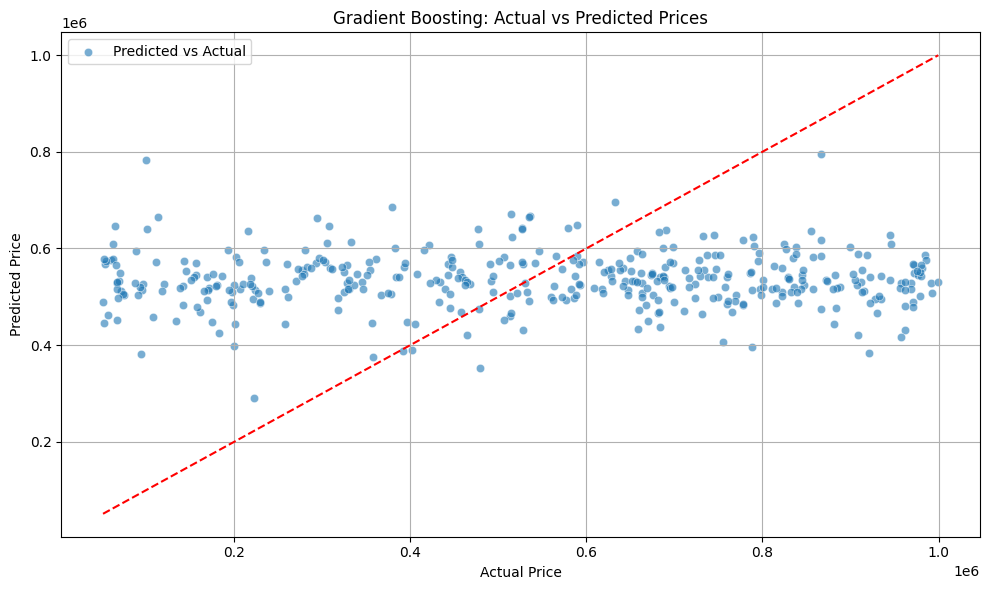

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_preds, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
